In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


## Load the dataset

In [4]:
# Load the housing dataset (Seattle house sales)
df = pd.read_csv("Housing.csv")  # Replace with your actual path if needed
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Drop unnecessary columns
### We remove 'id' and 'date' since they do not contribute to the prediction task.



In [5]:

df = df.drop(['id', 'date'], axis=1)


## Define features and target
### X contains all the input features, while y is the target variable we aim to predict (house price).

In [6]:

X = df.drop('price', axis=1)
y = df['price']


## Train test split
### Split the data into training and testing sets (80% train, 20% test)
### We divide the dataset to train the model on one part and test its performance on unseen data.


In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train models
### Initialize Regression Models : We define multiple regression algorithms to compare their performance on predicting house prices.



In [8]:

models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=1.0),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []


## Evaluate the models
### Each model is trained, and its predictions are evaluated using four metrics:

### -> R² Score
### -> RMSE (Root Mean Squared Error)
### -> MAE (Mean Absolute Error)
### -> MAPE (Mean Absolute Percentage Error)

### Also, a scatter plot shows how well predictions align with actual values.




📘 Linear Regression
R² Score: 0.7012
RMSE: ₹212,539
MAE: ₹127,494
MAPE: 24.95%


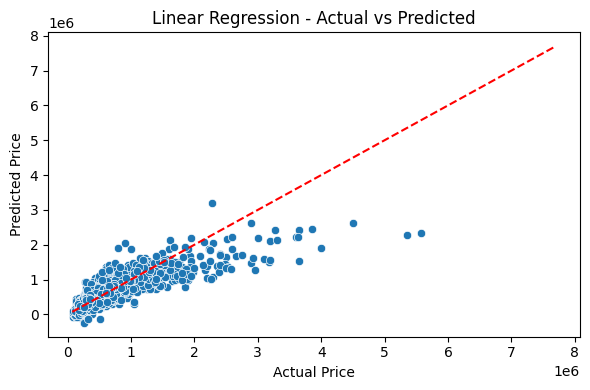

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.083e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(



📘 Lasso Regression
R² Score: 0.7012
RMSE: ₹212,541
MAE: ₹127,493
MAPE: 24.95%


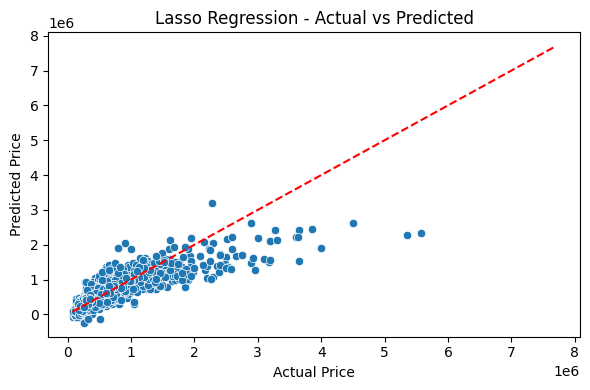


📘 Ridge Regression
R² Score: 0.7011
RMSE: ₹212,568
MAE: ₹127,488
MAPE: 24.95%


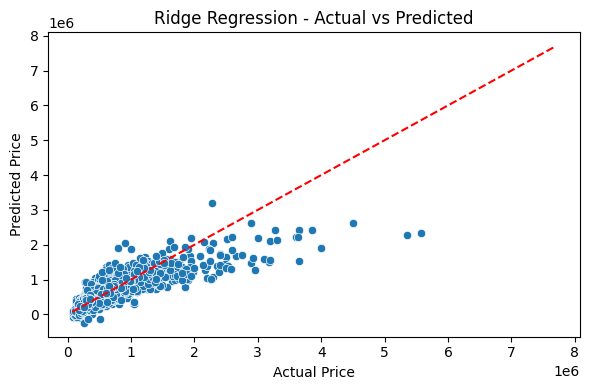


📘 Random Forest
R² Score: 0.8516
RMSE: ₹149,761
MAE: ₹72,864
MAPE: 13.14%


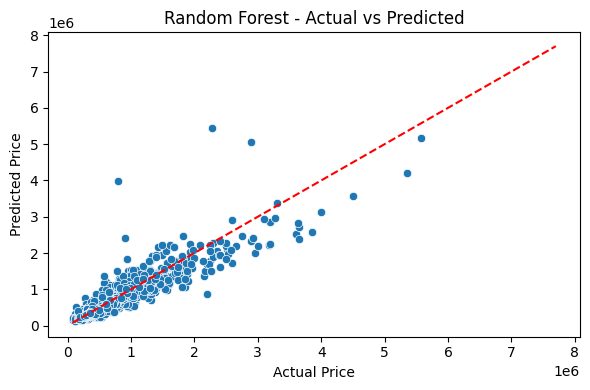

In [9]:
# Train each model, make predictions, and calculate evaluation metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    results.append([name, r2, rmse, mae, mape])
    
    print(f"\n📘 {name}")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: ₹{rmse:,.0f}")
    print(f"MAE: ₹{mae:,.0f}")
    print(f"MAPE: {mape:.2f}%")
    
    # Plot actual vs predicted
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{name} - Actual vs Predicted")
    plt.tight_layout()
    plt.show()


## Summary table
### We compile all evaluation results into one table for easy model comparison. The higher the R² and lower the errors, the better the model.

In [10]:

results_df = pd.DataFrame(results, columns=["Model", "R²", "RMSE", "MAE", "MAPE"])
print("\n📋 Summary of Model Evaluation:")
print(results_df.sort_values("R²", ascending=False))



📋 Summary of Model Evaluation:
               Model        R²           RMSE            MAE       MAPE
3      Random Forest  0.851641  149761.146950   72864.215670  13.136705
0  Linear Regression  0.701191  212539.471898  127493.630280  24.954431
1   Lasso Regression  0.701187  212540.631982  127493.190406  24.954049
2   Ridge Regression  0.701111  212567.713895  127487.875924  24.947971


## Predict the new house price

In [12]:
# Predict price for a new house using Random Forest
sample = {
    'bedrooms': 3,
    'bathrooms': 2.0,
    'sqft_living': 1800,
    'sqft_lot': 5000,
    'floors': 1.0,
    'waterfront': 0,
    'view': 0,
    'condition': 3,
    'grade': 7,
    'sqft_above': 1400,
    'sqft_basement': 400,
    'yr_built': 1990,
    'yr_renovated': 0,
    'zipcode': 98103,
    'lat': 47.65,
    'long': -122.34,
    'sqft_living15': 1600,
    'sqft_lot15': 4000
}

sample_df = pd.DataFrame([sample])
predicted_price = models["Random Forest"].predict(sample_df)[0]
print(f"\n🏠 Predicted House Price (Random Forest): ₹{predicted_price:,.0f}")



🏠 Predicted House Price (Random Forest): ₹611,274
